<h2> Accumulation Algorithim

This notebook will attempt to identify the target quoting participation rate ($k$) through modelling a VWAP participation Algorithim. We will consider various metrics such as trading costs, average price filled vs arrival price, and completition time. The purpose of this notebook is to learn how participation algorithims function in current markets. We will analyze various crypto pairs across 2022 and 2023, namely BTC_USD, and ETH_USD, and ETH_BTC. We will be specifically looking at both quoting participation rate, and different target volumes across datasets.

In [241]:

import prep as prep, vwapalgo as vw
import importlib

from vwapalgo import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h4> BTC/USD 2022

In [242]:
btc_usd_2022 = prep.get_trade_book('2022', 'BTC', 'USD', 'trades')
btc_usd_2022 = vw.clean_tradebook(btc_usd_2022)


<h5> Testing Q


Below we will see the metrics for $Q$ at various levels. $Q$ is a fraction of the volume at a quantile. We can either hold the quantile constant or the fraction. In this case we will keep the quantile of $Q$ constant at 0.65 and change the magnitude of it through fraction. We will also hold volume at 5min. Since we are trying to see how $k$ will be impacted, at base participation rate from 2% to a max 5%, we would hold $k$ constant for now at multiplier of 1.5, meaning effective quoting participation rate at 3%.


In [243]:
vw.test_quantity(btc_usd_2022, window = 15)

Quantity levels: [0.01, 0.025, 0.05]


,1,2,3
Metric,,,
target_quantity,0.527695,1.319237,2.638473
executed_quantity,0.369093,0.369093,0.369093
completion_rate,0.699445,0.279778,0.139889
execution_vwap,38032.568861,38032.568861,38032.568861
market_vwap,38027.634956,38027.634956,38027.634956
vwap_spread,-4.933904,-4.933904,-4.933904
vwap_performance,0.000130,0.000130,0.000130
total_value,14107.755350,14107.755350,14107.755350
total_fees,70.187838,70.187838,70.187838


As Q increases our completion rate goes down. In order to see the metrics closer to completion, we will increase our sample window from 15 min to 60 min to stress the window. This will allow for better analysis

In [244]:
vw.test_quantity(btc_usd_2022, window = 60)

Quantity levels: [0.01, 0.025, 0.05]


,1,2,3
Metric,,,
target_quantity,0.527695,1.319237,2.638473
executed_quantity,0.527695,1.319237,1.451441
completion_rate,1.000000,1.000000,0.550106
execution_vwap,36935.025825,36871.496680,36867.411521
market_vwap,36870.495373,36870.495373,36870.495373
vwap_spread,-64.530452,-1.001307,3.083852
vwap_performance,0.001750,0.000027,-0.000084
total_value,19587.868365,48885.441886,53778.419965
total_fees,97.452081,243.211154,267.554328


By increasing the interval to 60 minutes we see a change completion rates, at the highest $Q$, we see do not see a completion success. As expected, the number of trades, time to completion increases along with Q. The performance of the VWAP is decreasing as Q increases. So the more quantities we need to execute at under the same time frame stresses the price we accquire.

<h5> Testing K at level 0.01, 0.025, 0.05

Below we will see the metrics for $k$ at various rates, 1.1, 1.5, and 2. $k$ is being multiplied by our participation rate which at 2% and we utilize a max $k$ of 5%. In order to better see the impact of $k$, we will hold the window time at 60 minutes.

In [245]:
vw.test_quoting_rate_k(btc_usd_2022)

Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
Metric,,,
target_quantity,3.160039,3.160039,3.160039
executed_quantity,0.297199,0.742998,1.485996
completion_rate,0.094049,0.235123,0.470246
execution_vwap,37895.152348,37895.152348,37895.152348
market_vwap,37902.252616,37902.252616,37902.252616
vwap_spread,7.100268,7.100268,7.100268
vwap_performance,-0.000187,-0.000187,-0.000187
total_value,11318.721197,28296.802993,56593.605985
total_fees,56.312046,140.780114,281.560229


In [246]:
vw.analytic_metrics(vw.test_quoting_rate_k(btc_usd_2022))

Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
notional_per_time,2.477798,6.194494,12.388988
costs_per_notional,0.004975,0.004975,0.004975


As $ k $ increases, we achieve our target quantity faster. Since fewer trades are executed, transaction costs decrease due to a lower fee burden. However, the VWAP spread analysis reveals that higher $ k $ values lead to more significant deviations from the market price, resulting in worse fills at higher participation rates. The trade-off, however, is that increasing $ k $ ensures the completion of the allotted quantity within the given timeframe. Interestingly, in some cases, a higher $ k $ allows for larger executions with only a marginal increase in the number of trades, leading to an overall reduction in fees. Furthermore, a key downside to maintaining consistently high participation levels is the increased price impact on the market. This effect, which can be analyzed using a price impact model, underscores the importance of balancing execution speed with market impact considerations.

<h4> BTC/USD 2023

We will explore how the BTC/USD Currency pair participates in the market in 2023 relative to 2022

In [247]:
btc_usd_2023 = prep.get_trade_book('2023', 'BTC', 'USD', 'trades')
btc_usd_2023 = vw.clean_tradebook(btc_usd_2023)

<H5> Testing Q

In [248]:
vw.test_quantity(btc_usd_2023, window = 60)

Quantity levels: [0.01, 0.025, 0.05]


,1,2,3
Metric,,,
target_quantity,0.905473,2.263681,4.527363
executed_quantity,0.905473,1.134972,1.134972
completion_rate,1.000000,0.501383,0.250692
execution_vwap,23121.848212,23119.177533,23119.177533
market_vwap,23120.663855,23120.663855,23120.663855
vwap_spread,-1.184356,1.486322,1.486322
vwap_performance,0.000051,-0.000064,-0.000064
total_value,21040.880137,26370.818521,26370.818521
total_fees,104.680996,131.198102,131.198102


In [249]:
print(f"2022 Mean: {vw.test_quantity(btc_usd_2022, window = 60).loc['target_quantity'].mean()}")
print(f"2023 Mean: {vw.test_quantity(btc_usd_2023, window = 60).loc['target_quantity'].mean()}")

Quantity levels: [0.01, 0.025, 0.05]
2022 Mean: 1.4951348998350003
Quantity levels: [0.01, 0.025, 0.05]
2023 Mean: 2.5655055926875003


We see some parallels from 2022 to 2023 for the pattern of Q. As Q increases, the completion rate decreases. This model was not abole to hit completion rate of 1 and stopped out in 60 minutes. From this model we can also see that at higher quantities we are filling at better spreads. A few things two note, is that the price of BTC decreased from 38k to around 23k from January 2022 to January 2023 - yet the overall volume being traded within these sample intervals has increase.

<h5> Testing K

In [250]:
vw.test_quoting_rate_k(btc_usd_2023)

Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
Metric,,,
target_quantity,5.926130,5.926130,5.926130
executed_quantity,0.593161,1.482903,2.965805
completion_rate,0.100092,0.250231,0.500462
execution_vwap,22889.752382,22889.752382,22889.752382
market_vwap,22889.137864,22889.137864,22889.137864
vwap_spread,-0.614517,-0.614517,-0.614517
vwap_performance,0.000027,0.000027,0.000027
total_value,13645.196687,34112.991717,68225.983434
total_fees,67.886551,169.716377,339.432753


From above we can see as we increase $k$ the vwap spread gets better, and executing at lower prices. This is similar to the results seen in 2022.

In [251]:
#run monte carlo, ideal Q, ideal K

<h4> ETH/USD 2022


In [252]:
eth_usd_2022 = prep.get_trade_book('2022', 'ETH', 'USD', 'trades')
eth_usd_2022 = vw.clean_tradebook(eth_usd_2022)

<h5> Testing Q

In [253]:
test_quantity(eth_usd_2022)

Quantity levels: [0.01, 0.025, 0.05]


,1,2,3
Metric,,,
target_quantity,6.961474,17.403685,34.807370
executed_quantity,6.961474,11.874751,11.874751
completion_rate,1.000000,0.682312,0.341156
execution_vwap,2624.148387,2623.526481,2623.526481
market_vwap,2625.133587,2625.133587,2625.133587
vwap_spread,0.985200,1.607106,1.607106
vwap_performance,-0.000375,-0.000612,-0.000612
total_value,18359.280340,31309.491155,31309.491155
total_fees,91.339703,155.768613,155.768613


The prior relationships stand: Q increases, Completion Rate decreases, VWAP performance decreases, and the number of trades to completion along with fees increases. The potential reasons for completion to go down is because there could be liquidity issues relative to BTC to USD.

<h5> Testing K at level 0.01, 0.025, 0.05

In [254]:
vw.test_quoting_rate_k(eth_usd_2022)

Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
Metric,,,
target_quantity,42.895816,42.895816,42.895816
executed_quantity,18.226731,42.895816,42.895816
completion_rate,0.424907,1.000000,1.000000
execution_vwap,2686.521062,2685.425121,2682.840516
market_vwap,2682.833284,2682.833284,2682.833284
vwap_spread,-3.687777,-2.591837,-0.007231
vwap_performance,0.001375,0.000966,0.000003
total_value,49211.330289,115769.468573,115658.045462
total_fees,244.832489,575.967505,575.413162


As $k$ increases, we observe a higher completion rate and improved execution spreads. Additionally, trades are executed more quickly, requiring fewer transactions to reach completion. Consistent with the above results

<h4> ETH/USD 2023


<h5> Testing Q

In [255]:
Q_eth_usd_2023 = prep.get_trade_book('2023', 'ETH', 'USD', 'trades')
Q_eth_usd_2023 = vw.clean_tradebook(Q_eth_usd_2023)

In [256]:
vw.test_quantity(Q_eth_usd_2023)

Quantity levels: [0.01, 0.025, 0.05]


,1,2,3
Metric,,,
target_quantity,5.870890,14.677224,29.354448
executed_quantity,5.870890,14.677224,17.950814
completion_rate,1.000000,1.000000,0.611519
execution_vwap,1546.537558,1548.237473,1548.837171
market_vwap,1549.023032,1549.023032,1549.023032
vwap_spread,2.485474,0.785559,0.185861
vwap_performance,-0.001605,-0.000507,-0.000120
total_value,9124.948955,22837.447165,27941.902712
total_fees,45.397756,113.619140,139.014441


For ETH/USD 2023, in 60 minutes we hit the maximum trades completed for the quoting participation rate at 0.03. The higher the target volume the tighter the spreads are becoming between the VWAP. This is inconsistent with some of the other findings from this report. This could be due to the amount of liquidity avaliable within the same. There may not be a constant relationship between Q and the vwap spread. We will further investigate this in the monte carlo simulations.

<h5> Testing K at level 0.01, 0.025, 0.05

In [257]:
vw.test_quoting_rate_k(Q_eth_usd_2023)

Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
Metric,,,
target_quantity,41.615449,41.615449,4.161545e+01
executed_quantity,9.406560,23.516399,4.161545e+01
completion_rate,0.226035,0.565088,1.000000e+00
execution_vwap,1556.357317,1556.357317,1.556439e+03
market_vwap,1556.437896,1556.437896,1.556438e+03
vwap_spread,0.080579,0.080579,-1.161549e-03
vwap_performance,-0.000052,-0.000052,7.462865e-07
total_value,14713.167815,36782.919538,6.509577e+04
total_fees,73.199840,182.999600,3.238596e+02


Within 60 minutes, we see we fail to even to even come close to the completion rate in this sample. There is linear relationship between $k$ and the executed quantity. Comparing to 2022, see a sharpe increase in overall volume with in a time sample. This can be due to just the sentiment and popularity of Ethereum at the time in January 2023, compared to January 2022. One thing to note was this was months after FTX collopasd which brought BTC and ETH to year lows. Since then, in January 2023, the fed spoke about inflation cooling in the US, which may have caused a overall spike in the volume. This can explain why it is target quantities are higher in 2023 compared to 2022, and completion rates are lower$^2$

<h4> ETH/BTC 2022


<h5> Testing Q

In [258]:
Q_eth_btc_2022 = prep.get_trade_book('2022', 'ETH', 'BTC', 'trades')
Q_eth_btc_2022 = vw.clean_tradebook(Q_eth_btc_2022)

In [259]:
vw.test_quantity(Q_eth_btc_2022, fee_rate=0.0001)

Quantity levels: [0.01, 0.025, 0.05]


,1,2,3
Metric,,,
target_quantity,0.316769,0.791922,1.583844
executed_quantity,0.316769,0.791922,1.583844
completion_rate,1.000000,1.000000,1.000000
execution_vwap,0.068840,0.068858,0.068864
market_vwap,0.068869,0.068869,0.068869
vwap_spread,0.000029,0.000011,0.000005
vwap_performance,-0.000416,-0.000153,-0.000068
total_value,0.021809,0.054536,0.109081
total_fees,0.000002,0.000005,0.000011


The relationships between target Quantity and other metrics is what we would we expect, as Q increases, time to completion, number of trades, fees all increase. The VWAP spread is extremely tight here highlighting a pretty liquid market.

<h5> Testing K

In [260]:
vw.test_quoting_rate_k(Q_eth_btc_2022, fee_rate=0.001)


Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
Metric,,,
target_quantity,2.075263,2.075263,2.075263
executed_quantity,1.187500,2.075263,2.075263
completion_rate,0.572217,1.000000,1.000000
execution_vwap,0.070303,0.070339,0.070407
market_vwap,0.070281,0.070281,0.070281
vwap_spread,-0.000021,-0.000058,-0.000126
vwap_performance,0.000301,0.000823,0.001786
total_value,0.083568,0.146118,0.146259
total_fees,0.000083,0.000146,0.000146


The relationships remain consistent with the observations above: a higher  k  was able to complete fill orders in less time with fewer trades. However, executing larger quantities resulted in higher fees $^1$

<h4> ETH/BTC 2023


In [261]:
eth_btc_2023 = prep.get_trade_book('2023', 'ETH', 'BTC', 'trades')
eth_btc_2023 = vw.clean_tradebook(eth_btc_2023)


<h5> Testing Q

In [262]:
vw.test_quantity(eth_btc_2023, fee_rate=0.0001, fraction = [0.01, 0.025, 0.005])

Quantity levels: [0.01, 0.025, 0.005]


,1,2,3
Metric,,,
target_quantity,2.439000e-04,6.097500e-04,1.219500e-04
executed_quantity,2.439000e-04,6.097500e-04,1.219500e-04
completion_rate,1.000000e+00,1.000000e+00,1.000000e+00
execution_vwap,7.086000e-02,7.086000e-02,7.086000e-02
market_vwap,7.087229e-02,7.087229e-02,7.087229e-02
vwap_spread,1.229301e-05,1.229301e-05,1.229301e-05
vwap_performance,-1.734529e-04,-1.734529e-04,-1.734529e-04
total_value,1.728448e-05,4.321121e-05,8.642241e-06
total_fees,1.728275e-09,4.320689e-09,8.641377e-10


For the specified metrics we get extremely low target quantity levels, so we can adjust for purpose of analysis

In [263]:
vw.test_quantity(eth_btc_2023, fee_rate=0.0001, fraction = [0.5, 0.75, 1])


Quantity levels: [0.5, 0.75, 1]


,1,2,3
Metric,,,
target_quantity,1.219500e-02,1.829250e-02,2.439000e-02
executed_quantity,1.219500e-02,1.829250e-02,2.439000e-02
completion_rate,1.000000e+00,1.000000e+00,1.000000e+00
execution_vwap,7.084507e-02,7.084338e-02,7.084254e-02
market_vwap,7.084014e-02,7.084014e-02,7.084014e-02
vwap_spread,-4.928825e-06,-3.237659e-06,-2.392075e-06
vwap_performance,6.957673e-05,4.570373e-05,3.376723e-05
total_value,8.640421e-04,1.296032e-03,1.728022e-03
total_fees,8.639557e-08,1.295903e-07,1.727849e-07


By utilizing the full 65 percentile, we are able to stress the model. The spreads are extremely tight between the vwap. The relationships between Q hold constant. Interesting that the volume between ETH and BTC is dramatically lower around this time

<h5> Testing K

In [264]:
vw.test_quoting_rate_k(eth_btc_2023, fee_rate = 0.0001)

Quoted Participation levels: [0.01,0.025,0.5]


,1,2,3
Metric,,,
target_quantity,6.043473e-02,6.043473e-02,6.043473e-02
executed_quantity,2.784148e-04,6.960371e-04,1.392074e-03
completion_rate,4.606868e-03,1.151717e-02,2.303434e-02
execution_vwap,7.081000e-02,7.081000e-02,7.081000e-02
market_vwap,7.081000e-02,7.081000e-02,7.081000e-02
vwap_spread,0.000000e+00,0.000000e+00,0.000000e+00
vwap_performance,0.000000e+00,0.000000e+00,0.000000e+00
total_value,1.971653e-05,4.929131e-05,9.858263e-05
total_fees,1.971455e-09,4.928638e-09,9.857277e-09


The relationship with K we have seen holds constant. There are much tighter spreads between ETH and BTC then other pairs

<h4> Monte Carlo

We will use the dataset from BTC_USD_2023 to see the relationships between Q and k

In [ ]:
q_fractions = [0.01, 0.025, 0.05]
results_Q = vw.parameter_test(btc_usd_2023, parameter_type="Q", parameter_values=q_fractions,
                           fixed_k=0.03, num_simulations=200, window_length_min=15, fee_rate=0.005, pause=0.1)

vw.plot_parameter_results(results_Q, param_label='Fraction')

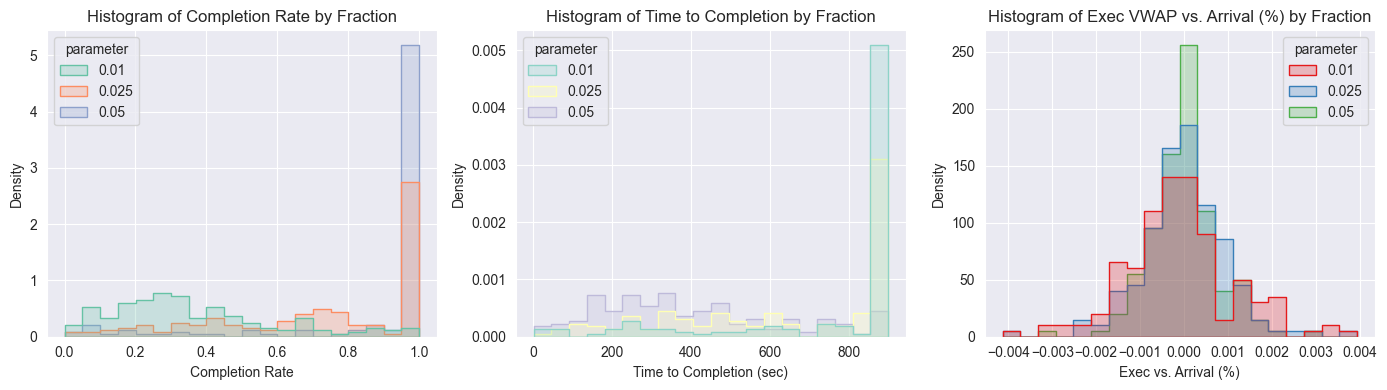

In [240]:
k_values = [0.01, 0.025, 0.05]
results_K = vw.parameter_test(btc_usd_2023, parameter_type="K", parameter_values=k_values,
                           fraction_for_Q=0.01, num_simulations=200, window_length_min=15, fee_rate=0.005, pause=0.1)
vw.plot_parameter_results(results_K, param_label="Fraction")

<h4> Conclusion

From the data above we can conclude that for a liquid pair, a lower target quantity coupled with high quoted participation rate would bring the most opmital accumulation at a price near or better than the VWAP


Footnotes

$^1$ AI was use to rephrase <br> $^2$ [Crypto Markets increase in Volume](https://www.forbes.com/sites/cbovaird/2023/01/30/why-are-crypto-markets-having-such-a-good-january/)

